### Import libraries that is needed for Data Understanding and Exploration

In [137]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
plotly.__version__
%matplotlib inline
import plotly.offline as offline
import plotly.graph_objs as go

### 1. Ensure that the dataset is imported successfully

In [138]:
tiktok_df = pd.read_csv('topfive.csv') 

In [139]:
tiktok_df.head()

,user_name,user_id,video_id,video_desc,video_time,video_length,video_link,n_likes,n_shares,n_comments,n_plays,video_timestamp,country,year,YEAR_2,video_id_shortened
0,zachking,6.861650e+16,6.997430e+18,#behindthescenes @shaymitchell,1629215827,13,https://www.tiktok.com/@zachking/video/6997428...,660000,824,1423,5600000,8/17/2021,US,2021,2021,20433
1,zachking,6.861650e+16,6.995540e+18,#ad You never know when you might win Instant ...,1628776286,16,https://www.tiktok.com/@zachking/video/6995540...,394300,951,1045,4900000,8/12/21,US,2021,2021,488520
2,zachking,6.861650e+16,6.993010e+18,The #lighthouse keeper‚Äôs job never ends,1628186532,55,https://www.tiktok.com/@zachking/video/6993007...,379700,980,1740,3200000,8/5/21,US,2021,2021,413990
3,zachking,6.861650e+16,6.989650e+18,The magical #travel agency @shaymitchell,1627405829,28,https://www.tiktok.com/@zachking/video/6989654...,884000,2223,3441,5400000,7/27/2021,US,2021,2021,126841
4,zachking,6.861650e+16,6.987450e+18,#ad Even lunchtime is an adventure! Build it y...,1626892734,17,https://www.tiktok.com/@zachking/video/6987451...,622500,906,1422,5000000,7/21/2021,US,2021,2021,158925


In [140]:
print("Shape",tiktok_df.shape)  # Display the shape number of rows anf number of columns
print(tiktok_df.dtypes)         # Display the data type for each column

Shape (43746, 16)
user_name              object
user_id               float64
video_id              float64
video_desc             object
video_time              int64
video_length            int64
video_link             object
n_likes                 int64
n_shares                int64
n_comments              int64
n_plays                 int64
video_timestamp        object
country                object
year                    int64
YEAR_2                  int64
video_id_shortened      int64
dtype: object


### 2. Proper checks need to be taken (E.g. duplication and null checks, detect/deal with any outliers and missing values)

In [141]:
# Checking for duplication for whole data
tiktok_df.duplicated().sum()
# No duplication in each row

0

In [142]:
# Checking for duplication for video
tiktok_df.duplicated(subset=['user_id','video_id','video_id_shortened','video_link']).sum()
# No duplicated videos for each user 

0

In [143]:
# Null checks for all columns
tiktok_df.isnull().sum()
# Null values in column 'video_desc', not important as this column is filled by user(has a choice if they want to fill in)

user_name                0
user_id                  0
video_id                 0
video_desc            2809
video_time               0
video_length             0
video_link               0
n_likes                  0
n_shares                 0
n_comments               0
n_plays                  0
video_timestamp          0
country                  0
year                     0
YEAR_2                   0
video_id_shortened       0
dtype: int64

In [144]:
# Checking the difference between column 'year' and 'YEAR_2'.
np.where(tiktok_df.year != tiktok_df.YEAR_2)

(array([], dtype=int64),)

### 3. Provide appropriate statistics (e.g. range, mode, mean, median, variance, counts, etc.) for the most important features/columns. Then describe what they mean or if you found something interesting from the statistics

In [145]:
tiktok_df.head()

,user_name,user_id,video_id,video_desc,video_time,video_length,video_link,n_likes,n_shares,n_comments,n_plays,video_timestamp,country,year,YEAR_2,video_id_shortened
0,zachking,6.861650e+16,6.997430e+18,#behindthescenes @shaymitchell,1629215827,13,https://www.tiktok.com/@zachking/video/6997428...,660000,824,1423,5600000,8/17/2021,US,2021,2021,20433
1,zachking,6.861650e+16,6.995540e+18,#ad You never know when you might win Instant ...,1628776286,16,https://www.tiktok.com/@zachking/video/6995540...,394300,951,1045,4900000,8/12/21,US,2021,2021,488520
2,zachking,6.861650e+16,6.993010e+18,The #lighthouse keeper‚Äôs job never ends,1628186532,55,https://www.tiktok.com/@zachking/video/6993007...,379700,980,1740,3200000,8/5/21,US,2021,2021,413990
3,zachking,6.861650e+16,6.989650e+18,The magical #travel agency @shaymitchell,1627405829,28,https://www.tiktok.com/@zachking/video/6989654...,884000,2223,3441,5400000,7/27/2021,US,2021,2021,126841
4,zachking,6.861650e+16,6.987450e+18,#ad Even lunchtime is an adventure! Build it y...,1626892734,17,https://www.tiktok.com/@zachking/video/6987451...,622500,906,1422,5000000,7/21/2021,US,2021,2021,158925


In [146]:
tiktok_df['user_name'].value_counts() #Suppose to be 45 rows as top 5 times 9 countries

era_ays                     3000
itzshauni                   2868
kylethomas                  2124
cahyanirynn                 2097
sandys.ss                   2056
junya1gou                   2025
thekiryalife                1842
charlidamelio               1833
sarahmagusara               1795
kjormo                      1776
h3yimrobby                  1762
thexhan                     1548
karna.val                   1505
addisonre                   1462
anokhinalz                  1349
caleb.finn                  1297
riaricis                    1297
abbyroberts                 1261
gurobelly                   1221
rybkatwinsofficial          1110
hollyh                      1083
emilielein88                 888
notnot8                      830
kageihina                    705
cindy518c                    682
ox_zung                      594
marcusandmartinus            518
bayashi.tiktok               449
mochapom                     370
bellapoarch                  362
zachking  

In [147]:
tiktok_df.loc[tiktok_df['user_name'] == 'emilielein89'] #Checking the row details

,user_name,user_id,video_id,video_desc,video_time,video_length,video_link,n_likes,n_shares,n_comments,n_plays,video_timestamp,country,year,YEAR_2,video_id_shortened
21695,emilielein89,12780584.0,6.559550e+18,STOR NYHET!\n@sorlandssenterte1 arrangerer #PI...,1527265354,14,https://www.tiktok.com/@emilielein88/video/655...,164100,402,541,998200,5/27/2019,Norway,2019,2019,798390


In [148]:
#Checking for similarity user_id with 'emilielein89'
tiktok_df.query('user_id == 12780584.0')['user_name']

21409    emilielein88
21410    emilielein88
21411    emilielein88
21412    emilielein88
21413    emilielein88
             ...     
22293    emilielein88
22294    emilielein88
22295    emilielein88
22296    emilielein88
22297    emilielein88
Name: user_name, Length: 889, dtype: object

In [149]:
#same user for emilielein88 and emilielein89,
tiktok_df['user_name'].replace({'emilielein89': 'emilielein88'}, inplace=True)


In [150]:
tiktok_df['user_name'].value_counts() #Recheck again

era_ays                     3000
itzshauni                   2868
kylethomas                  2124
cahyanirynn                 2097
sandys.ss                   2056
junya1gou                   2025
thekiryalife                1842
charlidamelio               1833
sarahmagusara               1795
kjormo                      1776
h3yimrobby                  1762
thexhan                     1548
karna.val                   1505
addisonre                   1462
anokhinalz                  1349
caleb.finn                  1297
riaricis                    1297
abbyroberts                 1261
gurobelly                   1221
rybkatwinsofficial          1110
hollyh                      1083
emilielein88                 889
notnot8                      830
kageihina                    705
cindy518c                    682
ox_zung                      594
marcusandmartinus            518
bayashi.tiktok               449
mochapom                     370
bellapoarch                  362
zachking  

In [151]:
# column 'video_time' is in seconds(UTC format), converting seconds to datetime format
# creating column 'time_posted' and 'date_posted' to have a look on the date and time in same format for all videos
tiktok_df['video_time'] = pd.to_datetime(tiktok_df['video_time'],unit='s')
tiktok_df['time_posted'] = tiktok_df.video_time.dt.time
tiktok_df['date_posted'] = tiktok_df.video_time.dt.date
tiktok_df['hour'] = tiktok_df.video_time.dt.round('H').dt.hour

In [152]:
tiktok_df.head()

,user_name,user_id,video_id,video_desc,video_time,video_length,video_link,n_likes,n_shares,n_comments,n_plays,video_timestamp,country,year,YEAR_2,video_id_shortened,time_posted,date_posted,hour
0,zachking,6.861650e+16,6.997430e+18,#behindthescenes @shaymitchell,2021-08-17 15:57:07,13,https://www.tiktok.com/@zachking/video/6997428...,660000,824,1423,5600000,8/17/2021,US,2021,2021,20433,15:57:07,2021-08-17,16
1,zachking,6.861650e+16,6.995540e+18,#ad You never know when you might win Instant ...,2021-08-12 13:51:26,16,https://www.tiktok.com/@zachking/video/6995540...,394300,951,1045,4900000,8/12/21,US,2021,2021,488520,13:51:26,2021-08-12,14
2,zachking,6.861650e+16,6.993010e+18,The #lighthouse keeper‚Äôs job never ends,2021-08-05 18:02:12,55,https://www.tiktok.com/@zachking/video/6993007...,379700,980,1740,3200000,8/5/21,US,2021,2021,413990,18:02:12,2021-08-05,18
3,zachking,6.861650e+16,6.989650e+18,The magical #travel agency @shaymitchell,2021-07-27 17:10:29,28,https://www.tiktok.com/@zachking/video/6989654...,884000,2223,3441,5400000,7/27/2021,US,2021,2021,126841,17:10:29,2021-07-27,17
4,zachking,6.861650e+16,6.987450e+18,#ad Even lunchtime is an adventure! Build it y...,2021-07-21 18:38:54,17,https://www.tiktok.com/@zachking/video/6987451...,622500,906,1422,5000000,7/21/2021,US,2021,2021,158925,18:38:54,2021-07-21,19


In [153]:
#Deleting columns that is not going to be used
del tiktok_df['user_id']
del tiktok_df['video_id']
del tiktok_df['video_id_shortened']
del tiktok_df['YEAR_2'] #deleting duplicates
del tiktok_df['video_time'] #deleting after extracting the date and time
del tiktok_df['video_timestamp'] #deleting as duplicating the date in 'date_posted', also the date in this column is not organized

In [154]:
#Rearranging columns for a better view on data
tiktok_df = tiktok_df[['country','user_name','time_posted','date_posted','n_likes','n_shares','n_comments','n_plays','video_desc','video_length','hour','year','video_link']]

In [155]:
tiktok_df['total'] = 1

In [156]:
tiktok_df.head()

,country,user_name,time_posted,date_posted,n_likes,n_shares,n_comments,n_plays,video_desc,video_length,hour,year,video_link,total
0,US,zachking,15:57:07,2021-08-17,660000,824,1423,5600000,#behindthescenes @shaymitchell,13,16,2021,https://www.tiktok.com/@zachking/video/6997428...,1
1,US,zachking,13:51:26,2021-08-12,394300,951,1045,4900000,#ad You never know when you might win Instant ...,16,14,2021,https://www.tiktok.com/@zachking/video/6995540...,1
2,US,zachking,18:02:12,2021-08-05,379700,980,1740,3200000,The #lighthouse keeper‚Äôs job never ends,55,18,2021,https://www.tiktok.com/@zachking/video/6993007...,1
3,US,zachking,17:10:29,2021-07-27,884000,2223,3441,5400000,The magical #travel agency @shaymitchell,28,17,2021,https://www.tiktok.com/@zachking/video/6989654...,1
4,US,zachking,18:38:54,2021-07-21,622500,906,1422,5000000,#ad Even lunchtime is an adventure! Build it y...,17,19,2021,https://www.tiktok.com/@zachking/video/6987451...,1


### 4. Carry out correlation and/or analysis done on the main features/columns identified

In [157]:
tiktok_df.groupby(['country'])[['total']].sum()

,total
country,
Australia,6120
Indonesia,8042
Japan,3511
Norway,4618
Russia,7797
SG,476
South Korea,1622
UK,7517
US,4043


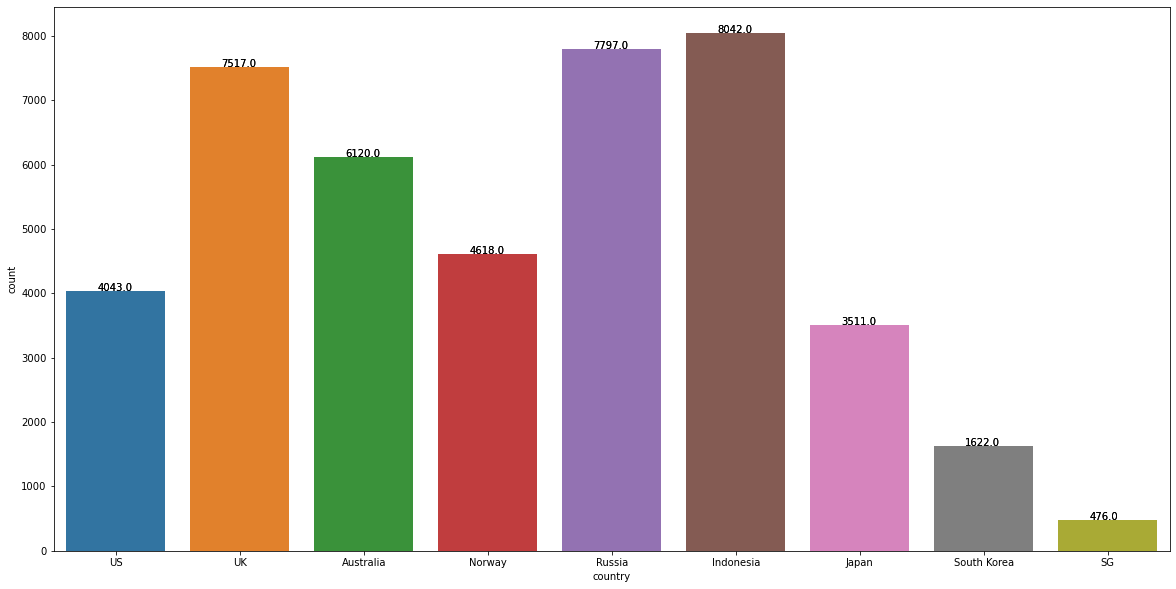

In [158]:
#Total number of videos in each country
plt.figure(figsize=(20,10))
sns.countplot(x=tiktok_df['country'])
ax = sns.countplot(x="country", data=tiktok_df)

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

In [159]:
#1 How many videos do they have in total?
tiktok_df.groupby(['country','user_name'])[['total']].count()#.sort_values(by = ['country','total'], ascending = False)

total
country     user_name                      
Australia   caleb.finn                 1297
            mochapom                    370
            rybkatwinsofficial         1110
            sarahmagusara              1795
            thexhan                    1548
Indonesia   cahyanirynn                2097
            h3yimrobby                 1762
            notnot8                     830
            riaricis                   1297
            sandys.ss                  2056
Japan       azchpn                      221
            bayashi.tiktok              449
            junya1gou                  2025
            kageihina                   705
            michael.jackton.official    111
Norway      alanwalkermusic             214
            emilielein88                889
            gurobelly                  1221
            kjormo                     1776
            marcusandmartinus           518
Russia      anokhinalz                 1349
            dina                        101
            era_ays                    3000
            karna.val                  1505
            thekiryalife               1842
SG          daddyming                    76
            iamwraya                    100
            mingweirocks                100
            nickaufmann                 100
            pipuy.com                   100
South Korea bp_tiktok                    88
            bts_official_bighit          47
            chang._.a                   211
            cindy518c                   682
            ox_zung                     594
UK          abbyroberts                1261
            gordonramsayofficial        181
            hollyh                     1083
            itzshauni                  2868
            kylethomas                 2124
US          addisonre                  1462
            bellapoarch                 362
            charlidamelio              1833
            willsmith                    90
            zachking                    296

(2014.0, 2022.0)

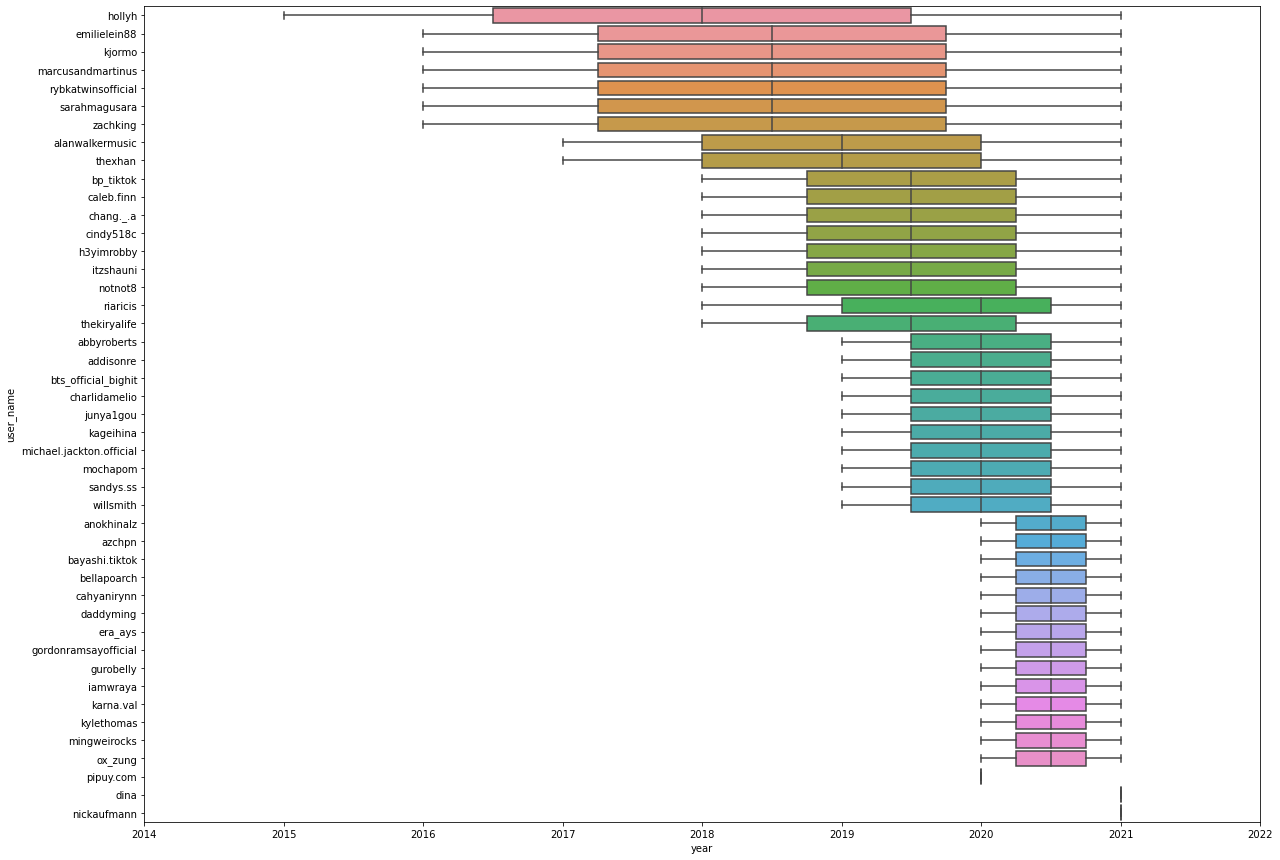

In [160]:
plt.figure(figsize=(20,15))
total = tiktok_df.groupby(['year','user_name'])[['total']].count()
total.reset_index(inplace=True)
box = sns.boxplot(x='year', y='user_name', data=total);
box.set_xlim(2014, 2022)

In [161]:
#2 How many videos do they post in a year?
tiktok_df.groupby(['year','country','user_name'])[['total']].count()

total
year country   user_name                
2015 UK        hollyh                 40
2016 Australia rybkatwinsofficial     68
               sarahmagusara          15
     Norway    emilielein88          100
               kjormo                 96
...                                  ...
2021 US        addisonre             179
               bellapoarch           187
               charlidamelio         239
               willsmith              30
               zachking               46

[149 rows x 1 columns]

In [162]:
df_aus = tiktok_df.loc[tiktok_df["country"] =="Australia"]
df_ind = tiktok_df.loc[tiktok_df["country"] =="Indonesia"]
df_jp = tiktok_df.loc[tiktok_df["country"] =="Japan"]
df_nwy = tiktok_df.loc[tiktok_df["country"] =="Norway"]
df_rsa = tiktok_df.loc[tiktok_df["country"] =="Russia"]
df_sg = tiktok_df.loc[tiktok_df["country"] =="SG"]
df_sk = tiktok_df.loc[tiktok_df["country"] =="South Korea"]
df_uk = tiktok_df.loc[tiktok_df["country"] =="UK"]
df_us = tiktok_df.loc[tiktok_df["country"] =="US"]


In [163]:
user_post = df_uk.groupby(['date_posted','time_posted','user_name'])[['total']].count()
user_post

total
date_posted time_posted user_name                  
2015-08-17  22:00:14    hollyh                    1
2015-08-18  02:15:09    hollyh                    1
            13:30:52    hollyh                    1
2015-08-19  14:04:20    hollyh                    1
2015-08-21  19:36:19    hollyh                    1
...                                             ...
2021-08-28  22:22:25    abbyroberts               1
2021-08-29  15:25:52    itzshauni                 1
            17:39:09    gordonramsayofficial      1
            18:13:33    itzshauni                 1
            18:15:10    abbyroberts               1

[7517 rows x 1 columns]

In [164]:
#3 The average number of shares for each user
tiktok_df.groupby(['user_name','date_posted'])[['n_shares']].mean()#.sort_values(by = ['country'], ascending = False)


n_shares
user_name   date_posted          
abbyroberts 2019-01-16     2448.0
            2019-01-19      946.0
            2019-01-28    30200.0
            2019-01-30     1105.0
            2019-02-07     1140.0
...                           ...
zachking    2021-07-21      906.0
            2021-07-27     2223.0
            2021-08-05      980.0
            2021-08-12      951.0
            2021-08-17      824.0

[19917 rows x 1 columns]

### 5. Exploration of relationships between different features/columns and explain patterns or trends found within them

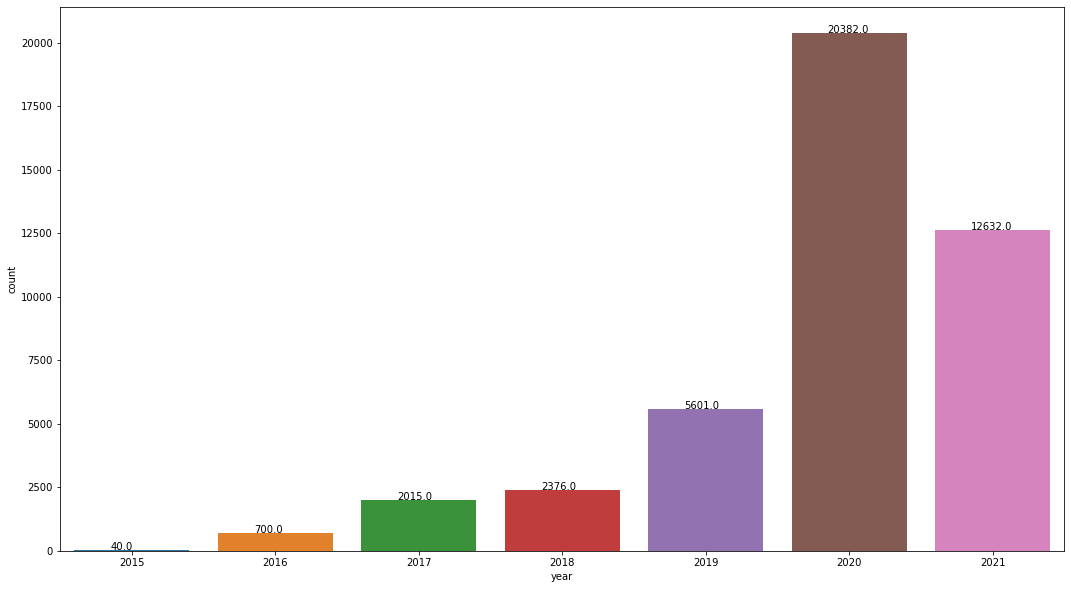

In [165]:
#Total number of videos growing every year
plt.figure(figsize=(18,10))
ax = sns.countplot(x=tiktok_df['year'])

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

In [166]:
tiktok_df.groupby(['user_name'],as_index=False)[['n_likes','n_comments','n_shares','n_plays']].sum()

,user_name,n_likes,n_comments,n_shares,n_plays
0,abbyroberts,982994800,4609323,6228690,5076185900
1,addisonre,5221586200,54760727,83030392,39011000000
2,alanwalkermusic,17919280,238302,177026,161134600
3,anokhinalz,868440836,7733175,2118651,6761157200
4,azchpn,89817011,441116,2105524,875567100
5,bayashi.tiktok,226869851,2028157,1182428,1985968700
6,bellapoarch,1732480700,22876797,11410485,16346600000
7,bp_tiktok,194954000,2100964,3845770,1309900000
8,bts_official_bighit,467300000,11432600,11811600,2708500000
9,cahyanirynn,675232255,4708767,2809830,5167798400


### Q1 Who started using tiktok from this 9 countries?are they the top 1 user in the country?

(2014.0, 2022.0)

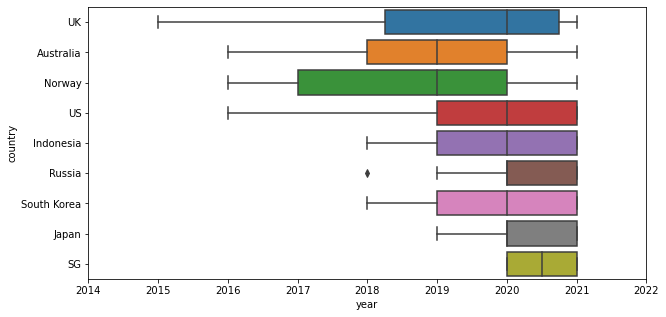

In [167]:
#Total number of videos for each country from the year they created a video till 2021
plt.figure(figsize=(10,5))
total = tiktok_df.groupby(['year','country','user_name'])[['total']].count()
total.reset_index(inplace=True)
box = sns.boxplot(x='year', y='country', data=total);
box.set_xlim(2014, 2022)

In [168]:
df_uk.groupby(['year','user_name'])[['n_likes']].mean().sort_values(by=['year','n_likes'],ascending =False)

n_likes
year user_name                         
2021 gordonramsayofficial  1.442323e+06
     abbyroberts           5.409051e+05
     kylethomas            4.760567e+05
     itzshauni             1.830291e+05
     hollyh                5.711957e+04
2020 gordonramsayofficial  2.363809e+06
     abbyroberts           1.000452e+06
     kylethomas            2.552859e+05
     itzshauni             2.336238e+05
     hollyh                2.241605e+05
2019 abbyroberts           6.822413e+05
     hollyh                5.491183e+05
     itzshauni             5.480559e+04
2018 hollyh                8.833681e+05
     itzshauni             4.146284e+04
2017 hollyh                1.483553e+05
2016 hollyh                5.371499e+04
2015 hollyh                3.728145e+04

(2015.0, 2022.0)

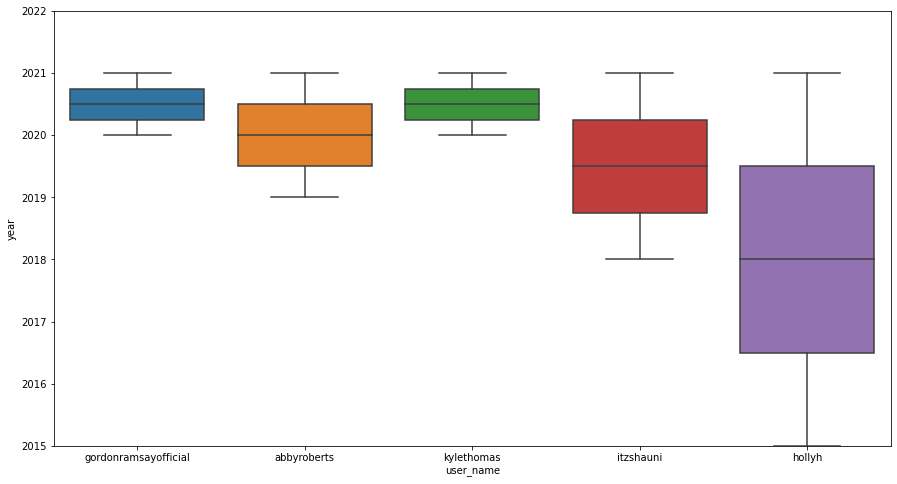

In [169]:
plt.figure(figsize=(15,8))
total_uk = df_uk.groupby(['year','user_name'])[['n_likes']].mean().sort_values(by=['year','n_likes'],ascending =False)
total_uk.reset_index(inplace=True)
box = sns.boxplot(x='user_name', y='year', data=total_uk);
box.set_ylim(2015, 2022)


In [170]:
df_uk.groupby(['user_name'])[['n_likes','n_comments','n_shares','n_plays']].mean().sort_values(by = ['n_likes','n_comments','n_shares','n_plays'],ascending=False)

,n_likes,n_comments,n_shares,n_plays
user_name,,,,
gordonramsayofficial,1.839428e+06,13437.928177,45889.033149,1.426125e+07
abbyroberts,7.795359e+05,3655.291832,4939.484536,4.025524e+06
hollyh,3.407251e+05,2628.893813,2831.014774,2.248198e+06
kylethomas,3.333456e+05,3641.640772,1483.873823,2.498491e+06
itzshauni,1.537518e+05,1169.793584,696.774407,1.472068e+06


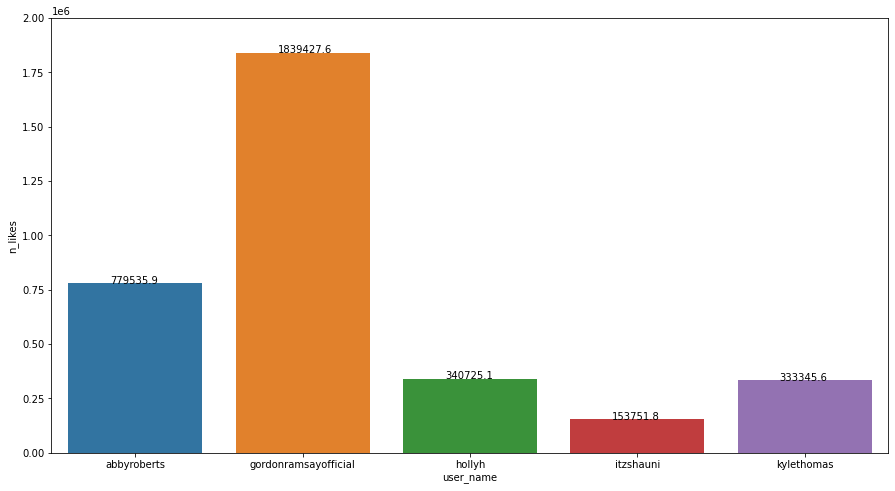

In [171]:
plt.figure(figsize=(15,8))
total_uk = df_uk.groupby(['user_name'])[['n_likes','n_comments','n_shares','n_plays']].mean()
total_uk.reset_index(inplace=True)
bar = sns.barplot(x='user_name', y='n_likes', data=total_uk);
bar.set_ylim(0, 2000000)

for p in bar.patches:
   bar.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

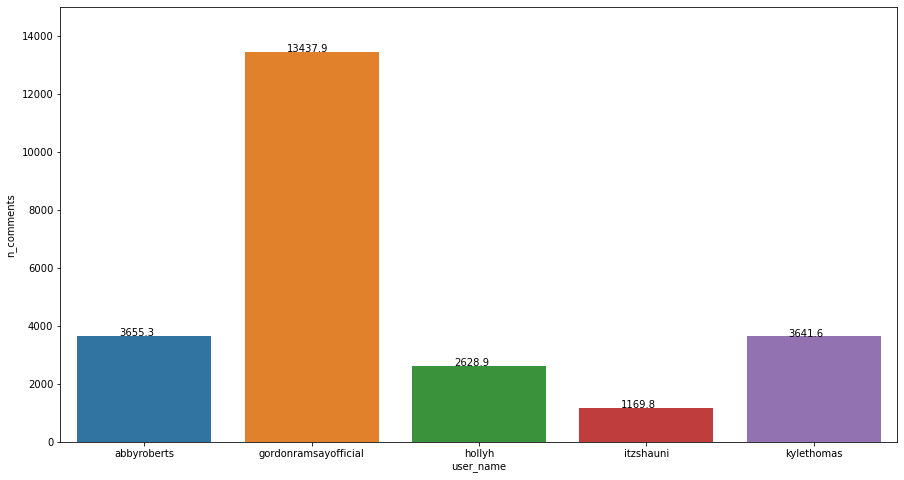

In [172]:
plt.figure(figsize=(15,8))
total_uk = df_uk.groupby(['user_name'])[['n_likes','n_comments','n_shares','n_plays']].mean()
total_uk.reset_index(inplace=True)
bar = sns.barplot(x='user_name', y='n_comments', data=total_uk);
bar.set_ylim(0, 15000)

for p in bar.patches:
   bar.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

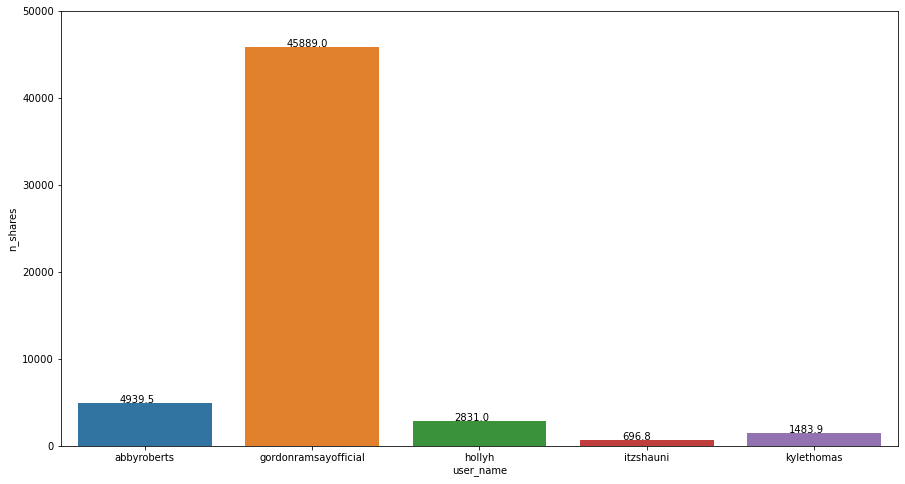

In [173]:
plt.figure(figsize=(15,8))
total_uk = df_uk.groupby(['user_name'])[['n_likes','n_comments','n_shares','n_plays']].mean()
total_uk.reset_index(inplace=True)
bar = sns.barplot(x='user_name', y='n_shares', data=total_uk);
bar.set_ylim(0, 50000)

for p in bar.patches:
   bar.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

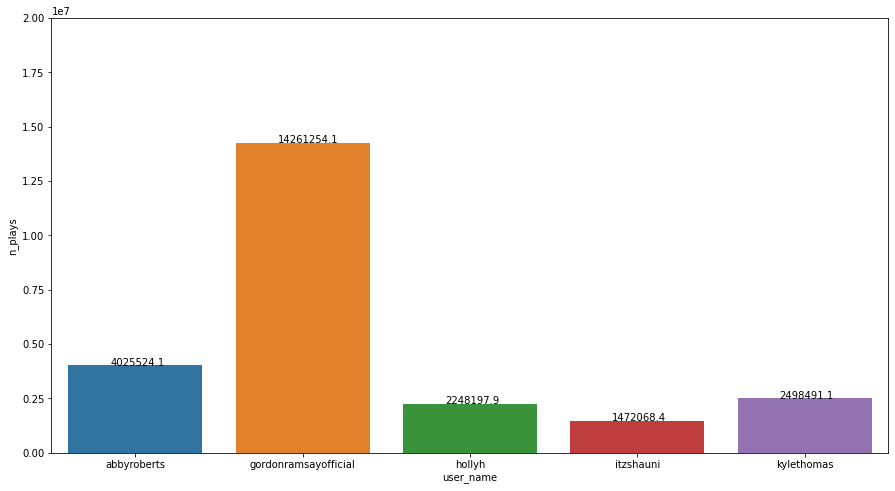

In [174]:
plt.figure(figsize=(15,8))
total_uk = df_uk.groupby(['user_name'])[['n_likes','n_comments','n_shares','n_plays']].mean()
total_uk.reset_index(inplace=True)
bar = sns.barplot(x='user_name', y='n_plays', data=total_uk);
bar.set_ylim(0, 20000000)

for p in bar.patches:
   bar.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

### Q2 Does the average length of video affect the numbers of likes, plays and shares?

In [175]:
aus = df_aus.groupby(['user_name'])[['video_length','n_likes','n_plays','n_shares']].mean().sort_values(by = 'video_length')
aus


,video_length,n_likes,n_plays,n_shares
user_name,,,,
rybkatwinsofficial,12.997297,280709.459459,1.972717e+06,1565.661261
mochapom,13.300000,474862.867568,3.035540e+06,8087.554054
sarahmagusara,13.637883,555636.601671,3.515902e+06,3990.226184
thexhan,13.919251,226270.734496,1.416869e+06,2326.897933
caleb.finn,14.549730,368892.579800,2.108534e+06,7105.972244


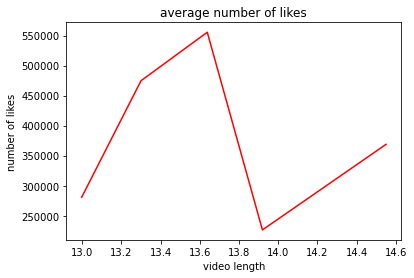

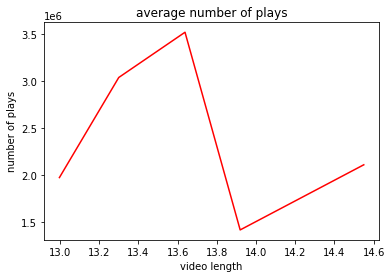

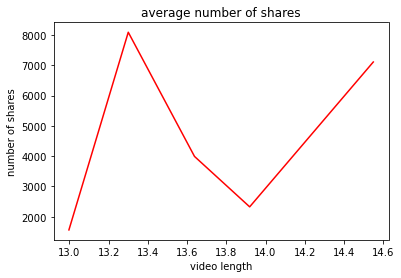

In [176]:
fig, ax0 = plt.subplots()
ax0.plot(aus.video_length, aus.n_likes, 'r')
ax0.set_xlabel('video length')
ax0.set_ylabel('number of likes')
ax0.set_title('average number of likes');

fig, ax1 = plt.subplots()
ax1.plot(aus.video_length, aus.n_plays, 'r')
ax1.set_xlabel('video length')
ax1.set_ylabel('number of plays')
ax1.set_title('average number of plays');

fig, ax2 = plt.subplots()
ax2.plot(aus.video_length, aus.n_shares, 'r')
ax2.set_xlabel('video length')
ax2.set_ylabel('number of shares')
ax2.set_title('average number of shares');

In [177]:
ind = df_ind.groupby(['user_name'])[['video_length','n_likes','n_plays','n_shares']].mean().sort_values(by = 'video_length')
ind

,video_length,n_likes,n_plays,n_shares
user_name,,,,
notnot8,17.343373,182856.427711,1.898832e+06,2412.306024
riaricis,17.385505,361859.950655,3.500482e+06,2770.121820
sandys.ss,18.207685,211583.416829,1.874353e+06,1247.826362
cahyanirynn,23.393896,321999.167859,2.464377e+06,1339.928469
h3yimrobby,29.402951,205965.280363,1.621617e+06,4249.044835


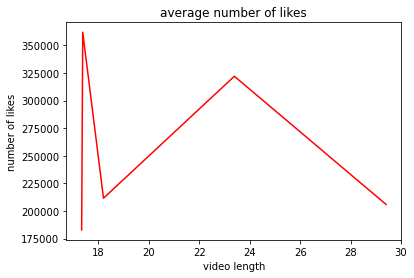

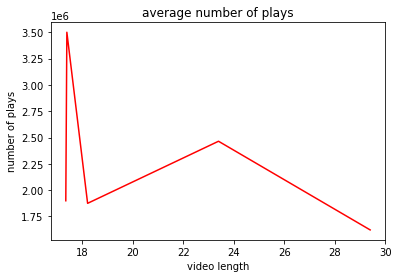

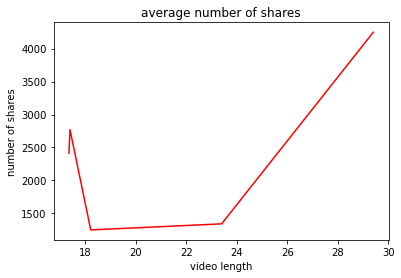

In [178]:
fig, ax0 = plt.subplots()
ax0.plot(ind.video_length, ind.n_likes, 'r')
ax0.set_xlabel('video length')
ax0.set_ylabel('number of likes')
ax0.set_title('average number of likes');

fig, ax1 = plt.subplots()
ax1.plot(ind.video_length, ind.n_plays, 'r')
ax1.set_xlabel('video length')
ax1.set_ylabel('number of plays')
ax1.set_title('average number of plays');

fig, ax2 = plt.subplots()
ax2.plot(ind.video_length, ind.n_shares, 'r')
ax2.set_xlabel('video length')
ax2.set_ylabel('number of shares')
ax2.set_title('average number of shares');

In [179]:
jp = df_jp.groupby(['user_name'])[['video_length','n_likes','n_plays','n_shares']].mean().sort_values(by = 'video_length')
jp

,video_length,n_likes,n_plays,n_shares
user_name,,,,
junya1gou,14.075556,302384.676543,5.087025e+06,7372.791605
kageihina,14.695035,272614.326241,4.050384e+06,3820.605674
michael.jackton.official,16.198198,606025.243243,5.893626e+06,5792.459459
azchpn,16.665158,406411.814480,3.961842e+06,9527.257919
bayashi.tiktok,30.761693,505278.064588,4.423093e+06,2633.469933


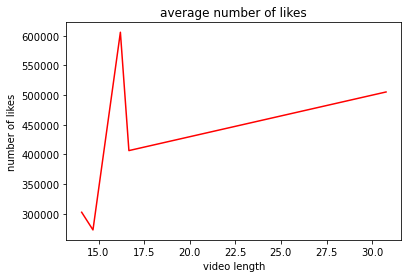

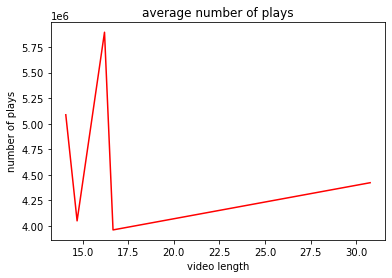

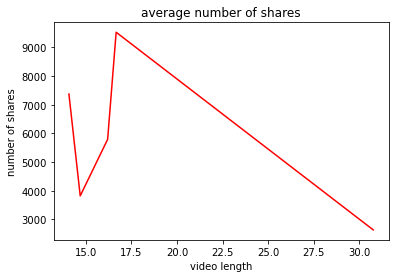

In [180]:
fig, ax0 = plt.subplots()
ax0.plot(jp.video_length, jp.n_likes, 'r')
ax0.set_xlabel('video length')
ax0.set_ylabel('number of likes')
ax0.set_title('average number of likes');

fig, ax1 = plt.subplots()
ax1.plot(jp.video_length, jp.n_plays, 'r')
ax1.set_xlabel('video length')
ax1.set_ylabel('number of plays')
ax1.set_title('average number of plays');

fig, ax2 = plt.subplots()
ax2.plot(jp.video_length, jp.n_shares, 'r')
ax2.set_xlabel('video length')
ax2.set_ylabel('number of shares')
ax2.set_title('average number of shares');

In [181]:
nwy = df_nwy.groupby(['user_name'])[['video_length','n_likes','n_plays','n_shares']].mean().sort_values(by = 'video_length')
nwy

,video_length,n_likes,n_plays,n_shares
user_name,,,,
emilielein88,11.543307,96066.652418,5.762910e+05,1101.047244
marcusandmartinus,12.505792,336155.984556,1.388495e+06,1944.277992
kjormo,13.069820,35905.250563,3.212581e+05,190.532095
gurobelly,13.994267,129997.622441,1.602411e+06,312.790336
alanwalkermusic,16.378505,83734.953271,7.529654e+05,827.224299


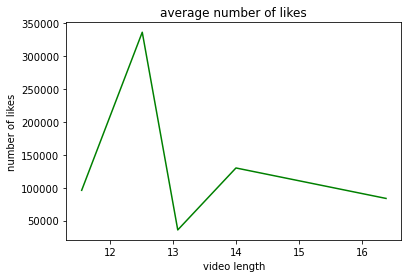

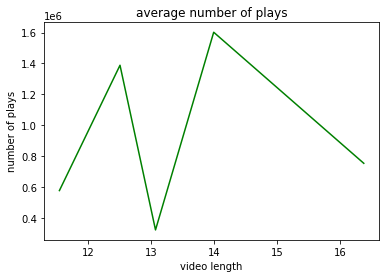

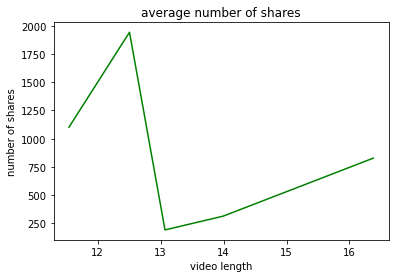

In [182]:
fig, ax0 = plt.subplots()
ax0.plot(nwy.video_length, nwy.n_likes, 'g')
ax0.set_xlabel('video length')
ax0.set_ylabel('number of likes')
ax0.set_title('average number of likes');

fig, ax1 = plt.subplots()
ax1.plot(nwy.video_length, nwy.n_plays, 'g')
ax1.set_xlabel('video length')
ax1.set_ylabel('number of plays')
ax1.set_title('average number of plays');

fig, ax2 = plt.subplots()
ax2.plot(nwy.video_length, nwy.n_shares, 'g')
ax2.set_xlabel('video length')
ax2.set_ylabel('number of shares')
ax2.set_title('average number of shares');

In [183]:
rsa = df_rsa.groupby(['user_name'])[['video_length','n_likes','n_plays','n_shares']].mean().sort_values(by = 'video_length')
rsa

,video_length,n_likes,n_plays,n_shares
user_name,,,,
anokhinalz,10.826538,6.437664e+05,5.011977e+06,1570.534470
era_ays,11.518333,2.098447e+05,2.435911e+06,480.254000
dina,12.376238,1.012724e+06,8.800109e+06,2869.435644
karna.val,16.633223,6.347488e+05,4.707534e+06,4527.988040
thekiryalife,16.963626,3.728635e+05,4.251335e+06,2115.178067


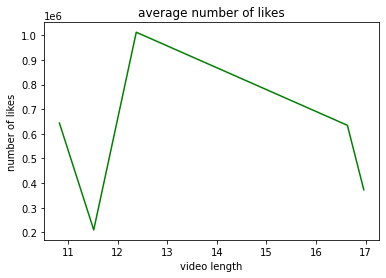

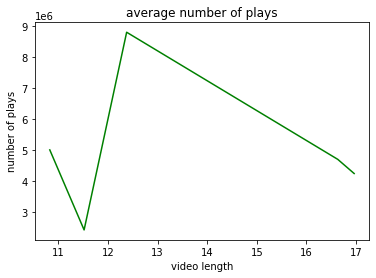

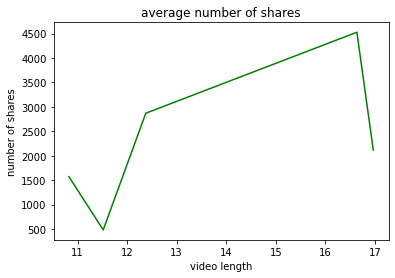

In [184]:
fig, ax0 = plt.subplots()
ax0.plot(rsa.video_length, rsa.n_likes, 'g')
ax0.set_xlabel('video length')
ax0.set_ylabel('number of likes')
ax0.set_title('average number of likes');

fig, ax1 = plt.subplots()
ax1.plot(rsa.video_length, rsa.n_plays, 'g')
ax1.set_xlabel('video length')
ax1.set_ylabel('number of plays')
ax1.set_title('average number of plays');

fig, ax2 = plt.subplots()
ax2.plot(rsa.video_length, rsa.n_shares, 'g')
ax2.set_xlabel('video length')
ax2.set_ylabel('number of shares')
ax2.set_title('average number of shares');

In [185]:
sg = df_sg.groupby(['user_name'])[['video_length','n_likes','n_plays','n_shares']].mean().sort_values(by = 'video_length')
sg

,video_length,n_likes,n_plays,n_shares
user_name,,,,
pipuy.com,10.290000,3.236130e+03,1.911585e+04,22.900000
nickaufmann,11.090000,3.201660e+05,1.973949e+06,1984.950000
iamwraya,14.600000,1.079521e+05,6.032420e+05,426.780000
daddyming,21.276316,1.302414e+06,1.438158e+07,7118.328947
mingweirocks,41.060000,1.996145e+06,2.365300e+07,7028.760000


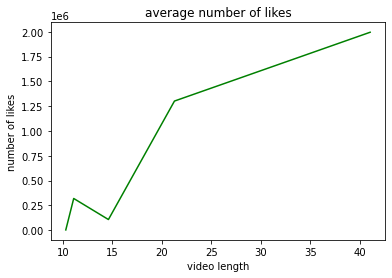

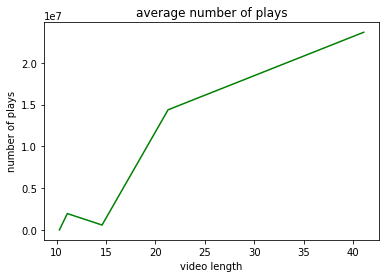

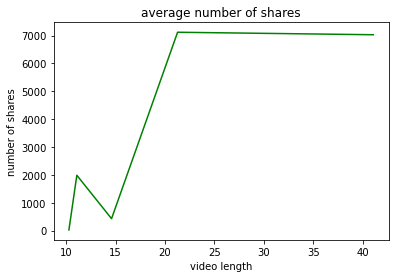

In [186]:
fig, ax0 = plt.subplots()
ax0.plot(sg.video_length, sg.n_likes, 'g')
ax0.set_xlabel('video length')
ax0.set_ylabel('number of likes')
ax0.set_title('average number of likes');

fig, ax1 = plt.subplots()
ax1.plot(sg.video_length, sg.n_plays, 'g')
ax1.set_xlabel('video length')
ax1.set_ylabel('number of plays')
ax1.set_title('average number of plays');

fig, ax2 = plt.subplots()
ax2.plot(sg.video_length, sg.n_shares, 'g')
ax2.set_xlabel('video length')
ax2.set_ylabel('number of shares')
ax2.set_title('average number of shares');

In [187]:
sk = df_sk.groupby(['user_name'])[['video_length','n_likes','n_plays','n_shares']].mean().sort_values(by = 'video_length')
sk

,video_length,n_likes,n_plays,n_shares
user_name,,,,
ox_zung,12.282828,1.152095e+06,9.090352e+06,7709.240741
cindy518c,13.844575,3.000746e+05,3.255642e+06,7590.838710
chang._.a,13.990521,7.709427e+05,4.829276e+06,9346.507109
bts_official_bighit,24.531915,9.942553e+06,5.762766e+07,251310.638298
bp_tiktok,25.568182,2.215386e+06,1.488523e+07,43701.931818


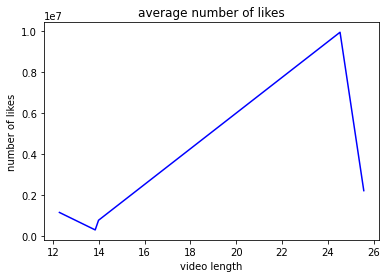

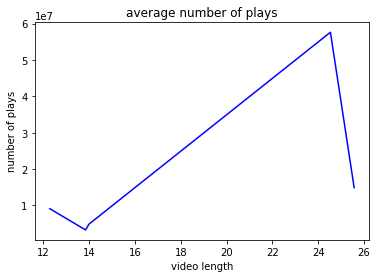

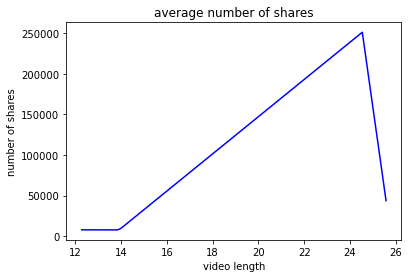

In [188]:
fig, ax0 = plt.subplots()
ax0.plot(sk.video_length, sk.n_likes, 'b')
ax0.set_xlabel('video length')
ax0.set_ylabel('number of likes')
ax0.set_title('average number of likes');

fig, ax1 = plt.subplots()
ax1.plot(sk.video_length, sk.n_plays, 'b')
ax1.set_xlabel('video length')
ax1.set_ylabel('number of plays')
ax1.set_title('average number of plays');

fig, ax2 = plt.subplots()
ax2.plot(sk.video_length, sk.n_shares, 'b')
ax2.set_xlabel('video length')
ax2.set_ylabel('number of shares')
ax2.set_title('average number of shares');

In [189]:
uk = df_uk.groupby(['user_name'])[['video_length','n_likes','n_plays','n_shares']].mean().sort_values(by = 'video_length')
uk

,video_length,n_likes,n_plays,n_shares
user_name,,,,
hollyh,12.637119,3.407251e+05,2.248198e+06,2831.014774
abbyroberts,14.457573,7.795359e+05,4.025524e+06,4939.484536
itzshauni,18.968271,1.537518e+05,1.472068e+06,696.774407
kylethomas,24.333804,3.333456e+05,2.498491e+06,1483.873823
gordonramsayofficial,32.033149,1.839428e+06,1.426125e+07,45889.033149


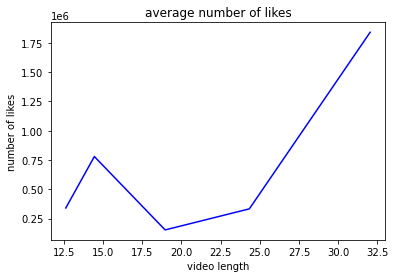

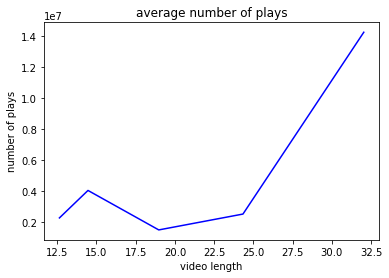

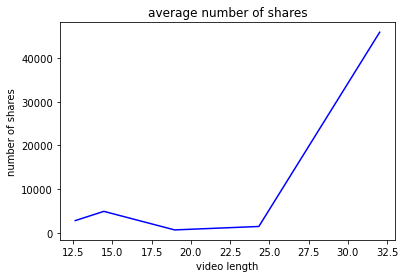

In [190]:
fig, ax0 = plt.subplots()
ax0.plot(uk.video_length, uk.n_likes, 'b')
ax0.set_xlabel('video length')
ax0.set_ylabel('number of likes')
ax0.set_title('average number of likes');

fig, ax1 = plt.subplots()
ax1.plot(uk.video_length, uk.n_plays, 'b')
ax1.set_xlabel('video length')
ax1.set_ylabel('number of plays')
ax1.set_title('average number of plays');

fig, ax2 = plt.subplots()
ax2.plot(uk.video_length, uk.n_shares, 'b')
ax2.set_xlabel('video length')
ax2.set_ylabel('number of shares')
ax2.set_title('average number of shares');

In [191]:
us = df_us.groupby(['user_name'])[['video_length','n_likes','n_plays','n_shares']].mean().sort_values(by = 'video_length')
us

,video_length,n_likes,n_plays,n_shares
user_name,,,,
bellapoarch,12.837017,4.785858e+06,4.515635e+07,31520.676796
addisonre,12.909029,3.571536e+06,2.668331e+07,56792.333789
charlidamelio,14.028914,5.111720e+06,3.972591e+07,157347.066012
zachking,17.993243,2.604733e+06,3.881689e+07,18414.270270
willsmith,20.500000,4.250643e+06,3.186778e+07,44741.822222


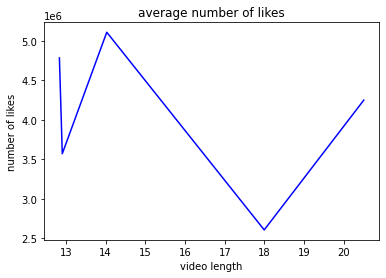

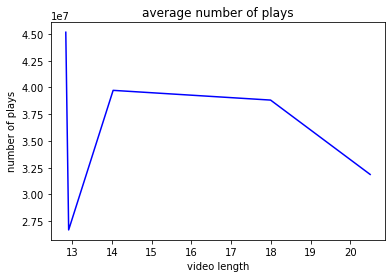

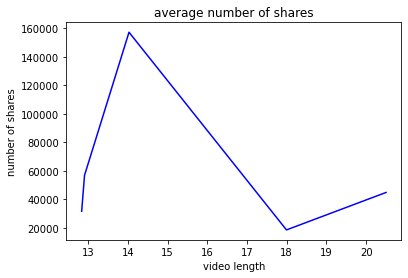

In [192]:
fig, ax0 = plt.subplots()
ax0.plot(us.video_length, us.n_likes, 'b')
ax0.set_xlabel('video length')
ax0.set_ylabel('number of likes')
ax0.set_title('average number of likes');

fig, ax1 = plt.subplots()
ax1.plot(us.video_length, us.n_plays, 'b')
ax1.set_xlabel('video length')
ax1.set_ylabel('number of plays')
ax1.set_title('average number of plays');

fig, ax2 = plt.subplots()
ax2.plot(us.video_length, us.n_shares, 'b')
ax2.set_xlabel('video length')
ax2.set_ylabel('number of shares')
ax2.set_title('average number of shares');

### Q3. Which user has the total highest number of likes, plays and shares?

In [193]:
tiktok_df.groupby(['user_name'])[['n_likes']].sum().sort_values(by=['n_likes'],ascending = False)


,n_likes
user_name,
charlidamelio,9369783100
addisonre,5221586200
bellapoarch,1732480700
sarahmagusara,997367700
abbyroberts,982994800
karna.val,955296900
anokhinalz,868440836
zachking,771001100
kylethomas,708026100


(0.0, 9400000000.0)

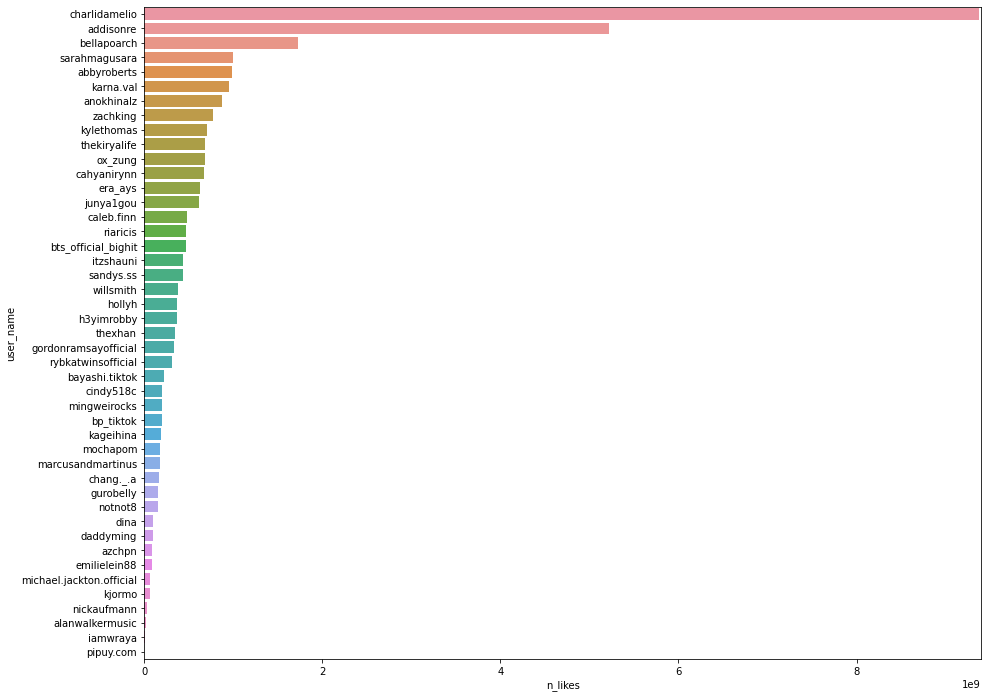

In [194]:
plt.figure(figsize=(15,12))
total = tiktok_df.groupby(['user_name'])[['n_likes']].sum().sort_values(by=['n_likes'],ascending = False)
total.reset_index(inplace=True)
bar = sns.barplot(x='n_likes', y='user_name', data=total);
bar.set_xlim(0, 9400000000)


In [195]:
tiktok_df.groupby(['user_name'])[['n_shares']].sum().sort_values(by=['n_shares'],ascending = False)

,n_shares
user_name,
charlidamelio,288417172
addisonre,83030392
junya1gou,14929903
bts_official_bighit,11811600
bellapoarch,11410485
caleb.finn,9216446
gordonramsayofficial,8305915
h3yimrobby,7486817
sarahmagusara,7162456


(0.0, 290000000.0)

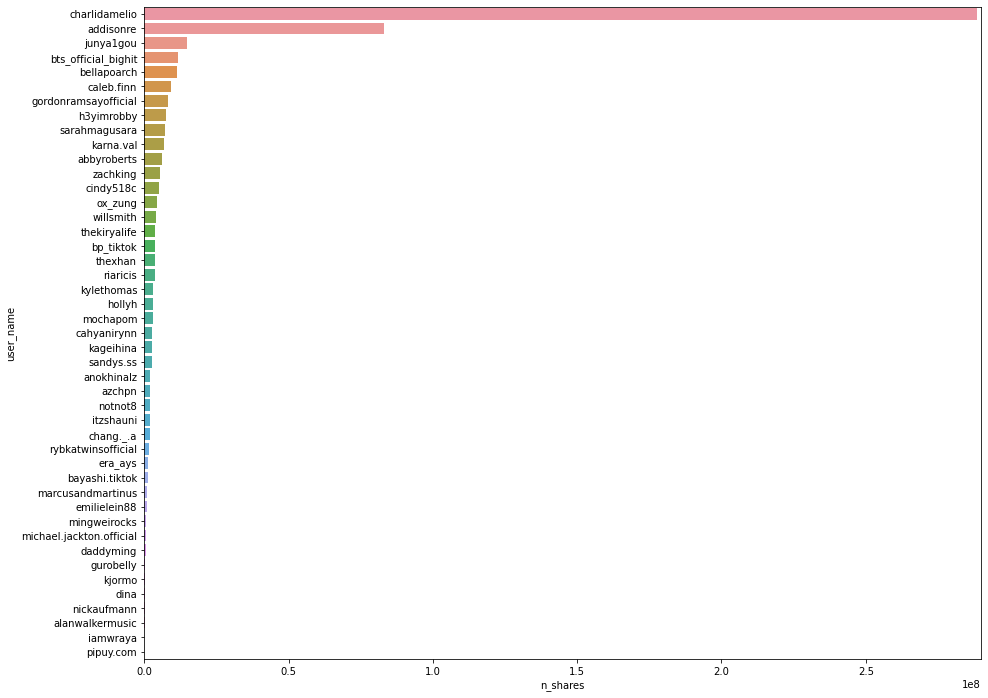

In [196]:
plt.figure(figsize=(15,12))
total = tiktok_df.groupby(['user_name'])[['n_shares']].sum().sort_values(by=['n_shares'],ascending = False)
total.reset_index(inplace=True)
bar = sns.barplot(x='n_shares', y='user_name', data=total);
bar.set_xlim(0, 290000000)

In [197]:
tiktok_df.groupby(['user_name'])[['n_plays']].sum().sort_values(by=['n_plays'],ascending = False)

,n_plays
user_name,
charlidamelio,72817600000
addisonre,39011000000
bellapoarch,16346600000
zachking,11489800000
junya1gou,10301226500
thekiryalife,7830959500
era_ays,7307732217
karna.val,7084839000
anokhinalz,6761157200


(0.0, 72900000000.0)

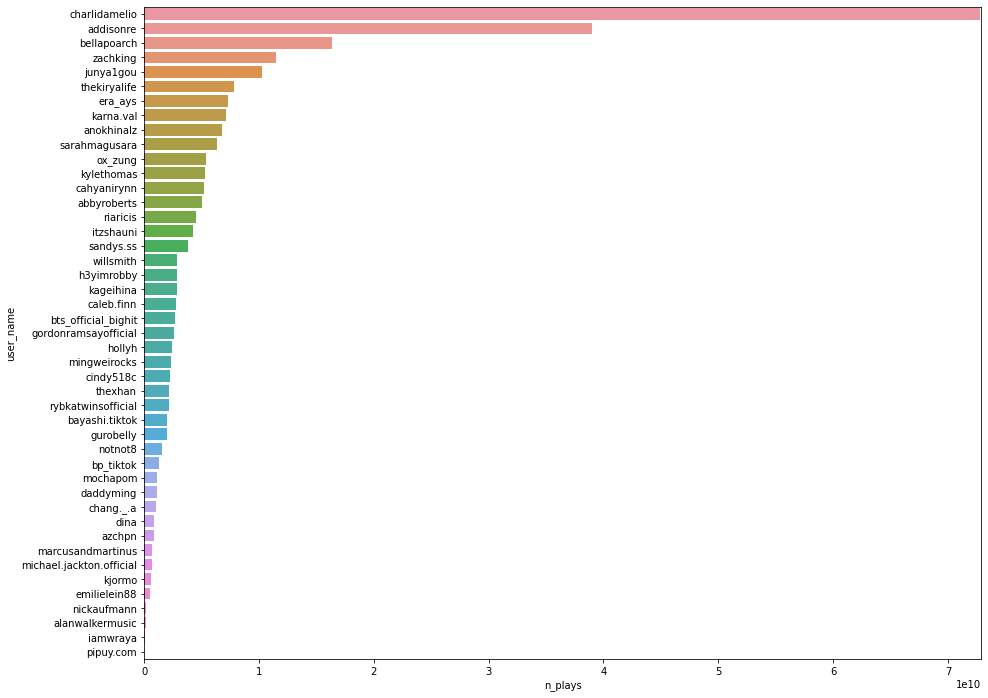

In [198]:
plt.figure(figsize=(15,12))
total = tiktok_df.groupby(['user_name'])[['n_plays']].sum().sort_values(by=['n_plays'],ascending = False)
total.reset_index(inplace=True)
bar = sns.barplot(x='n_plays', y='user_name', data=total);
bar.set_xlim(0, 72900000000)


### Q4. What is the video genre and the duration of the video?


In [199]:
charlidamelio_df = tiktok_df.loc[tiktok_df['user_name']== 'charlidamelio']
charlidamelio_df

,country,user_name,time_posted,date_posted,n_likes,n_shares,n_comments,n_plays,video_desc,video_length,hour,year,video_link,total
1758,US,charlidamelio,01:07:29,2021-08-28,2200000,12800,77100,11100000,NaN,8,1,2021,https://www.tiktok.com/@charlidamelio/video/70...,1
1759,US,charlidamelio,17:41:54,2021-08-27,851700,5251,47100,6700000,nyc hangs in the latest @socialtourist drop!! ...,9,18,2021,https://www.tiktok.com/@charlidamelio/video/70...,1
1760,US,charlidamelio,21:36:41,2021-08-21,3200000,156600,252500,21300000,a bee,14,22,2021,https://www.tiktok.com/@charlidamelio/video/69...,1
1761,US,charlidamelio,23:33:14,2021-08-20,3300000,54800,65400,22300000,happy birthday queen @gemmah_,6,0,2021,https://www.tiktok.com/@charlidamelio/video/69...,1
1762,US,charlidamelio,07:56:27,2021-08-19,2200000,88800,74000,17900000,@madi,15,8,2021,https://www.tiktok.com/@charlidamelio/video/69...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3586,US,charlidamelio,18:05:18,2019-08-10,865600,23600,5845,6100000,i will just keep doing this dance,14,18,2019,https://www.tiktok.com/@charlidamelio/video/67...,1
3587,US,charlidamelio,04:04:14,2019-08-10,910300,39700,12200,7900000,vegas baby,14,4,2019,https://www.tiktok.com/@charlidamelio/video/67...,1
3588,US,charlidamelio,22:37:22,2019-07-15,1500000,52100,20800,9400000,NaN,9,23,2019,https://www.tiktok.com/@charlidamelio/video/67...,1
3589,US,charlidamelio,06:47:49,2019-06-19,3800000,61400,87000,30100000,NaN,15,7,2019,https://www.tiktok.com/@charlidamelio/video/67...,1


In [200]:
charlidamelio_df.groupby(['date_posted','video_link'])[['n_plays']].max().sort_values(by='n_plays',ascending=False)


,,n_plays
date_posted,video_link,
2019-11-10,https://www.tiktok.com/@charlidamelio/video/6757768176831958278?lang=en,237400000
2020-03-25,https://www.tiktok.com/@charlidamelio/video/6807971434959310085?lang=en,196700000
2020-10-06,https://www.tiktok.com/@charlidamelio/video/6880354156398398726?lang=en,187100000
2020-06-12,https://www.tiktok.com/@charlidamelio/video/6837522273189055750?lang=en,184200000
2020-02-01,https://www.tiktok.com/@charlidamelio/video/6788588536363797766?lang=en,172500000
...,...,...
2019-09-29,https://www.tiktok.com/@charlidamelio/video/6742109579758406917?lang=en,2100000
2019-09-30,https://www.tiktok.com/@charlidamelio/video/6742614027031121158?lang=en,2100000
2019-09-03,https://www.tiktok.com/@charlidamelio/video/6732416604669316358?lang=en,2000000


In [201]:
charlidamelio_df.groupby(['date_posted','video_link'])[['n_likes']].max().sort_values(by='n_likes',ascending=False)


,,n_likes
date_posted,video_link,
2020-10-06,https://www.tiktok.com/@charlidamelio/video/6880354156398398726?lang=en,24100000
2020-06-12,https://www.tiktok.com/@charlidamelio/video/6837522273189055750?lang=en,21200000
2020-05-29,https://www.tiktok.com/@charlidamelio/video/6832385997485968646?lang=en,20700000
2020-05-30,https://www.tiktok.com/@charlidamelio/video/6832733422453116166?lang=en,19600000
2020-03-26,https://www.tiktok.com/@charlidamelio/video/6808644003647606021?lang=en,18800000
...,...,...
2019-09-03,https://www.tiktok.com/@charlidamelio/video/6732416604669316358?lang=en,279300
2019-08-17,https://www.tiktok.com/@charlidamelio/video/6726256895260232966?lang=en,252200
2019-09-29,https://www.tiktok.com/@charlidamelio/video/6742109579758406917?lang=en,242700


In [202]:
charlidamelio_df.groupby(['date_posted','video_link'])[['n_shares']].max().sort_values(by='n_shares',ascending=False)


n_shares
date_posted video_link                                                  
2020-08-08  https://www.tiktok.com/@charlidamelio/video/685...  52200000
            https://www.tiktok.com/@charlidamelio/video/685...  22700000
2020-08-03  https://www.tiktok.com/@charlidamelio/video/685...  10300000
2020-08-06  https://www.tiktok.com/@charlidamelio/video/685...   6800000
2020-08-07  https://www.tiktok.com/@charlidamelio/video/685...   1500000
...                                                                  ...
2019-08-28  https://www.tiktok.com/@charlidamelio/video/673...      5092
2019-08-24  https://www.tiktok.com/@charlidamelio/video/672...      5000
2020-01-14  https://www.tiktok.com/@charlidamelio/video/678...      4366
2019-09-14  https://www.tiktok.com/@charlidamelio/video/673...      4333
2019-08-17  https://www.tiktok.com/@charlidamelio/video/672...      4098

[1833 rows x 1 columns]

### Q5. When is the best time to post a video?

In [203]:
tiktok_df.groupby(['date_posted','hour'])[['n_plays']].max().sort_values(by='n_plays',ascending = False)

,,n_plays
date_posted,hour,
2019-12-09,18,2100000000
2019-12-03,18,1100000000
2019-10-19,14,966100000
2019-10-08,22,659300000
2020-08-18,3,637000000
...,...,...
2017-03-29,23,267
2016-12-30,18,259
2016-12-26,19,241


In [204]:
# create a list of conditions
conditions = [                                              #Parts of the Day.
    (tiktok_df['hour'] <= 12),                               #Morning 5 am to 12 pm (noon)
    (tiktok_df['hour'] > 12) & (tiktok_df['hour'] <= 17),     #Afternoon 12 pm to 5 pm.
    (tiktok_df['hour'] > 17) & (tiktok_df['hour'] <= 21),        #Evening 5 pm to 9 pm.
    (tiktok_df['hour'] > 21)                                     #Night 9 pm to 4 am.
    ]

# create a list of the values we want to assign for each condition
values = ['morning', 'afternoon', 'evening', 'night']

# create a new column and use np.select to assign values to it using our lists as arguments
tiktok_df['parts_of_day'] = np.select(conditions, values)

# display updated DataFrame
tiktok_df.head()

,country,user_name,time_posted,date_posted,n_likes,n_shares,n_comments,n_plays,video_desc,video_length,hour,year,video_link,total,parts_of_day
0,US,zachking,15:57:07,2021-08-17,660000,824,1423,5600000,#behindthescenes @shaymitchell,13,16,2021,https://www.tiktok.com/@zachking/video/6997428...,1,afternoon
1,US,zachking,13:51:26,2021-08-12,394300,951,1045,4900000,#ad You never know when you might win Instant ...,16,14,2021,https://www.tiktok.com/@zachking/video/6995540...,1,afternoon
2,US,zachking,18:02:12,2021-08-05,379700,980,1740,3200000,The #lighthouse keeper‚Äôs job never ends,55,18,2021,https://www.tiktok.com/@zachking/video/6993007...,1,evening
3,US,zachking,17:10:29,2021-07-27,884000,2223,3441,5400000,The magical #travel agency @shaymitchell,28,17,2021,https://www.tiktok.com/@zachking/video/6989654...,1,afternoon
4,US,zachking,18:38:54,2021-07-21,622500,906,1422,5000000,#ad Even lunchtime is an adventure! Build it y...,17,19,2021,https://www.tiktok.com/@zachking/video/6987451...,1,evening


In [205]:
tiktok_df.groupby(['parts_of_day'])[['total','n_plays']].sum()

,total,n_plays
parts_of_day,,
afternoon,13848,62742760738
evening,9198,76558352953
morning,17831,93753134843
night,2869,28487810474


<AxesSubplot:title={'center':'The amount of people posting their videos of by morning,afternoon,evening and night'}, ylabel='total'>

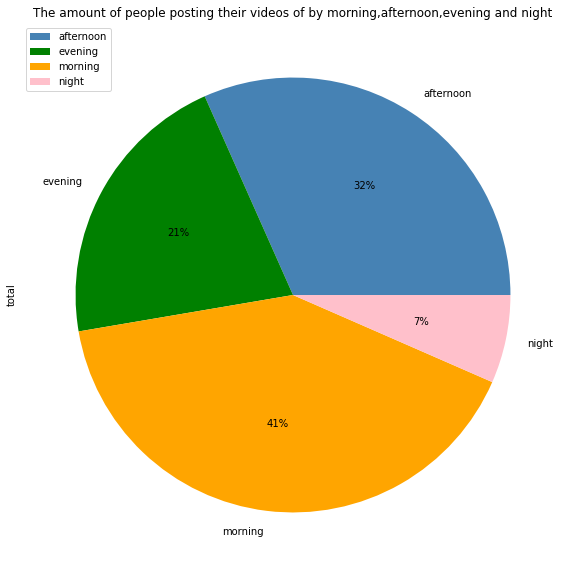

In [206]:
tiktok_df.groupby(['parts_of_day'])[['total','n_plays']].sum().plot(kind='pie', y='total', autopct='%1.0f%%', colors= ['steelblue', 'green','orange','pink'],
title = 'The amount of people posting their videos of by morning,afternoon,evening and night', figsize=(10,10))

### Q6. Does the number of '#' promotes and gain more number of likes and plays?

In [207]:
hash_count = tiktok_df.groupby(['n_likes','n_plays'])[['video_desc']].value_counts('#')
hash_count

n_likes   n_plays    video_desc                                                                                     
30        143        ITS not easy to get a Circle😂 #FeatureThis #CircleChallenge #Pringles #FeatureThis @musical.ly     1
55        463        I Tried, bla bla 😘#ReverseChallenge #BlaBla #Muser #FeatureThis                                    1
57        560        Say You Won't let Go 🚶🏼 #BRITs  #FeatureThis #Lipsync #FeatureMe                                   1
70        547        #HeartBeat #LoveMe #Norway #Muser #FeatureThis #FeatureMe                                          1
84        569        Everybody knows😍#ChangeChallenge #Lipsync #HannahMontana #FeatureThis                              1
                                                                                                                       ..
22000000  128100000  When we say FOR LIFE we mean it. Bad Boys came out 26 years ago today! @martinlawrence             1
23900000  161000000  @malek s

### Q7. Are there artist/influencers in the top 5, if yes, who and what are they promoting?

In [208]:
user_country_df = tiktok_df.groupby(['country','user_name'])[['total']].count()
user_country_df['artist_influencer'] = ['yes','yes','yes','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','no','yes','yes','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes']
user_country_df

total artist_influencer
country     user_name                                        
Australia   caleb.finn                 1297               yes
            mochapom                    370               yes
            rybkatwinsofficial         1110               yes
            sarahmagusara              1795               yes
            thexhan                    1548               yes
Indonesia   cahyanirynn                2097               yes
            h3yimrobby                 1762                no
            notnot8                     830               yes
            riaricis                   1297               yes
            sandys.ss                  2056               yes
Japan       azchpn                      221               yes
            bayashi.tiktok              449               yes
            junya1gou                  2025               yes
            kageihina                   705               yes
            michael.jackton.official    111               yes
Norway      alanwalkermusic             214               yes
            emilielein88                889               yes
            gurobelly                  1221               yes
            kjormo                     1776               yes
            marcusandmartinus           518               yes
Russia      anokhinalz                 1349               yes
            dina                        101               yes
            era_ays                    3000                no
            karna.val                  1505               yes
            thekiryalife               1842               yes
SG          daddyming                    76               yes
            iamwraya                    100               yes
            mingweirocks                100               yes
            nickaufmann                 100                no
            pipuy.com                   100               yes
South Korea bp_tiktok                    88               yes
            bts_official_bighit          47               yes
            chang._.a                   211               yes
            cindy518c                   682               yes
            ox_zung                     594               yes
UK          abbyroberts                1261               yes
            gordonramsayofficial        181               yes
            hollyh                     1083               yes
            itzshauni                  2868               yes
            kylethomas                 2124               yes
US          addisonre                  1462               yes
            bellapoarch                 362               yes
            charlidamelio              1833               yes
            willsmith                    90               yes
            zachking                    296               yes

In [209]:
user_country_df.groupby(['artist_influencer'])[['total']].count()

,total
artist_influencer,
no,3
yes,42


<AxesSubplot:title={'center':'Are the top 5 users artist/influencers?'}, ylabel='total'>

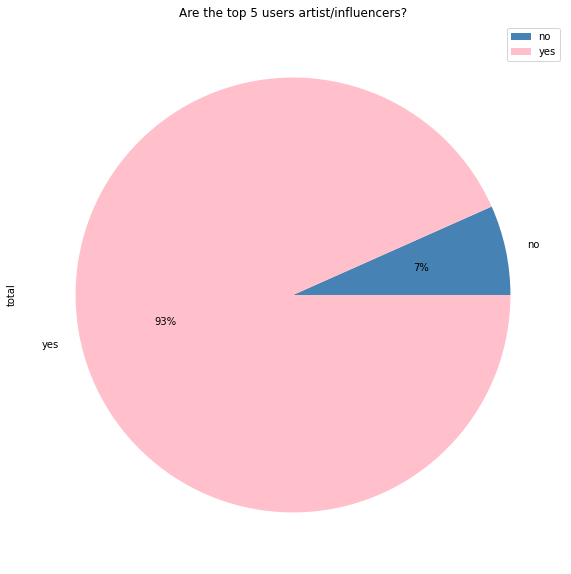

In [210]:
user_country_df.groupby(['artist_influencer'])[['total']].count().plot(kind='pie', y='total', autopct='%1.0f%%', colors= ['steelblue', 'pink'],
title = 'Are the top 5 users artist/influencers?', figsize=(10,10))